Un noeud $a$ est un **ancêtre** d'un noeud $b$ si:
- $a=b$ ou,
- $b$ est un noeud du sous-arbre gauche ou du sous-arbre droit de $a$. 

Si $a$ est un ancêtre de $b$, alors $b$ est un **descendant** de $a$.

<p style="text-align: center;">
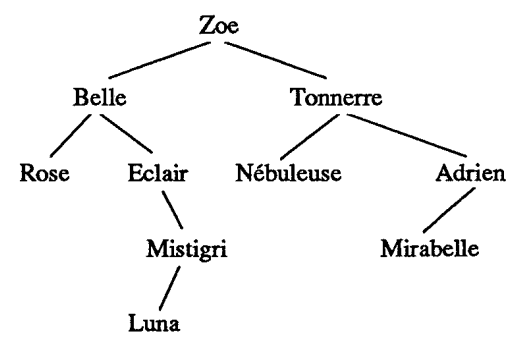
</p>

Ainsi, pour l'arbre «pedigree», *Mistigri* a pour **ancêtres** lui-même, Eclair, Belle et Zoe. Belle a pour **descendants** lui-même, Rose, Eclair, Mistigri et Luna.

*Note*: évidemment le vocabulaire est «à l'envers» pour cette situation particulière.

#### Exercice 5

Je pense que la consigne est claire à ce stade.

In [ ]:
%%run_pytest[clean]

def test_est_ancetre_ou_descendant(pedigree):
    assert False

In [ ]:
%%run_pytest[clean]

def test_est_ancetre_ou_descendant(pedigree):
    zoe = pedigree
    eclair = zoe.gauche.droit
    luna = eclair.droit.gauche
    mirabelle = zoe.droit.droit.gauche
    for n in [eclair, luna, mirabelle]:
        assert zoe.est_ancetre(n)
    assert eclair.est_ancetre(luna)
    assert not mirabelle.est_ancetre(luna)

In [ ]:
def est_ancetre(self, n):
    """Renvoie True si le noeud courant est un ancetre du noeud fourni en argument.
    Un noeud n1 est un ancetre d'un noeud n2 si n2 fait partie de l'arbre enraciné
    au noeud n1."""
    pass

NoeudBin.est_ancetre = est_ancetre
del est_ancetre

In [ ]:
def est_descendant(self, n):
    """Renvoie True si le noeud courant est un descendant du noeud fourni en argument."""
    pass

NoeudBin.est_descendant = est_descendant
del est_descendant

In [ ]:
def est_ancetre(self, n):
    """Renvoie True si le noeud courant est un ancetre du noeud fourni en argument.
    Un noeud n1 est un ancetre d'un noeud n2 si n2 fait partie de l'arbre enraciné
    au noeud n1."""
    if self is n:
        return True
    return (self.gauche.est_ancetre(n) if self.gauche else False) or \
           (self.droit.est_ancetre(n) if self.droit else False)

def est_descendant(self, n):
    """Renvoie True si le noeud courant est un descendant du noeud fourni en argument."""
    return n.est_ancetre(self)

NoeudBin.est_ancetre = est_ancetre
NoeudBin.est_descendant = est_descendant
del est_ancetre; del est_descendant

# Arbre binaire - partie 2

Pour récupérer les acquis de la partie1, exécuter la portion de code cachée:

In [ ]:
# «machinerie» de pytest
import pytest
import ipytest
ipytest.autoconfig()

# ajustement du sys.path
import sys, os
if not sys.path[0].endswith("code"): # pour éviter de re-modifier sys.path
    # sys.path est une liste contennant tous les dossiers où python
    # recherche les modules/paquets chargés avec import.
    # le premier d'entre eux est le répertoire courant,
    # modifions le de façon à ce qu'il pointe sur le dossier «code» du
    # répertoire courant.
    sys.path[0] = os.path.join(sys.path[0], "code")

from noeud_bin_p2 import NoeudBin

@pytest.fixture()
def pedigree():
    return NoeudBin("Zoé",
        NoeudBin("Belle",
            NoeudBin("Rose"),
            NoeudBin("Eclair",       # alternativement
               None,                 # droit=NoudBin("Mistigri",...)
               NoeudBin("Mistigri",
                   NoeudBin("Luna")
               ),
            ),
        ),
        NoeudBin("Tonnerre",
            NoeudBin("Nébuleuse"),
            NoeudBin("Adrien",
                NoeudBin("Mirabelle")
            )
        )
    )

@pytest.fixture()
def mon_arbre():
    N = NoeudBin # alias
    return N("+",
        N("-",
            N("x"),
            N("*", N(2), N("y")),
        ),
        N("*",
            N("+",
                N("x"),
                N("/", N("y"), N("z")),
            ),
            N(3),
        ),
    )

Utiliser ensuite la table des matières.

## Arbres binaires particuliers

Un arbre binaire est dit **localement complet** si *tous ses noeuds internes sont doubles*. Il est **complet** si, de plus, *toutes ses feuilles sont à la même profondeur*.

Par exemple l'arbre «arithmétique» est *localement complet* mais **pas** *complet*.

<p style="text-align: center;">
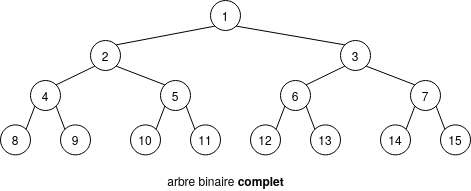
</p>

Il est **parfait** si *tous ses niveaux sont remplies de gauche à droite sauf peut-être le dernier*.

<p style="text-align: center;">
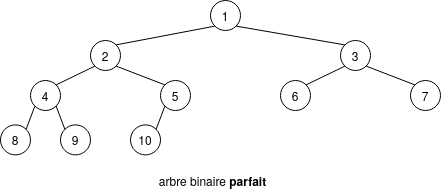
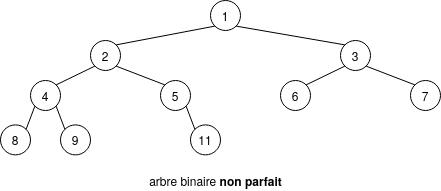
</p>

Un arbre complet est donc nécessairement parfait mais la réciproque est fausse. On prendra garde que ces deux mots sont fréquemment intervertis (aussi bien en français qu'en anglais).

Un arbre binaire est **filiforme** (ou **dégénéré**) si *tous ses noeuds internes sont simples*.

<p style="text-align: center;">
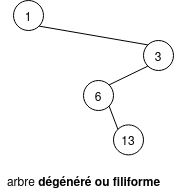
</p>

In [ ]:
@pytest.fixture()
def complet():
    return NoeudBin(1,
        NoeudBin(2,
            NoeudBin(4),
            NoeudBin(5)
        ),
        NoeudBin(3,
            NoeudBin(6),
            NoeudBin(7)
        ),
    )

#### Exercice 6

In [ ]:
%%run_pytest[clean]

def test_est_complet(pedigree, mon_arbre, complet):
    assert False

In [ ]:
%%run_pytest[clean]

def test_est_complet(pedigree, mon_arbre, complet):
    assert not pedigree.est_localement_complet()
    assert not pedigree.est_complet()
    assert mon_arbre.est_localement_complet() # mon_arbre est l'arbre «arithmétique»
    assert not mon_arbre.est_complet()
    assert complet.est_localement_complet()
    assert complet.est_complet()

In [ ]:
def est_localement_complet(self):
    """Test si l'arbre binaire enraciné au noeud courant self est localement complet.
    """
    pass

NoeudBin.est_localement_complet = est_localement_complet
del est_localement_complet

In [ ]:
def est_localement_complet(self):
    """Test si l'arbre binaire enraciné au noeud courant self est localement complet.
    """
    if self.est_feuille():
        return True
    return (self.gauche.est_localement_complet() if self.gauche else False) and\
           (self.droit.est_localement_complet() if self.droit else False)

NoeudBin.est_localement_complet = est_localement_complet
del est_localement_complet

In [ ]:
def est_complet(self):
    """Test si l'arbre binaire enraciné au noeud courant self est complet.
    """
    pass # réfléchir au lien entre le nombre de noeuds de l'arbre et sa hauteur

NoeudBin.est_complet = est_complet
del est_complet

In [ ]:
def est_complet(self):
    """Test si l'arbre binaire enraciné au noeud courant self est complet.
    """
    h = self.hauteur()
    return self.taille() == 2 ** (h+1) - 1

NoeudBin.est_complet = est_complet
del est_complet

Réaliser un fixture de façon à obtenir un arbre filiforme aléatoirement.

In [ ]:
@pytest.fixture()
def degenere():
    from random import randint
    racine = NoeudBin("") # peu importe la valeur des noeuds ici
    n = racine
    for _ in ...:
        pass
    return racine

In [ ]:
@pytest.fixture()
def degenere():
    from random import randint
    racine = NoeudBin("")
    n = racine
    for _ in range(randint(10, 20)):
        piece = randint(0, 1)
        if piece == 0:
            n.gauche = NoeudBin("")
            n = n.gauche
        else:
            n.droit = NoeudBin("")
            n = n.droit
    return racine

In [ ]:
%%run_pytest[clean]

def test_degenere(pedigree, complet, degenere):
    assert not pedigree.est_filiforme()
    assert not complet.est_filiforme()
    assert degenere.est_filiforme()

In [ ]:
def est_filiforme(self):
    pass

NoeudBin.est_filiforme = est_filiforme
del est_filiforme

In [ ]:
def est_filiforme(self):
    if self.est_feuille():
        return True
    elif self.est_double():
        return False
    else:
        return self.gauche.est_filiforme() if self.gauche else self.droit.est_filiforme()

NoeudBin.est_filiforme = est_filiforme
del est_filiforme

## Occurrence d'un noeud

Pour un arbre binaire, l'**occurrence** d'un noeud est une chaîne (éventuellement vide) formée de **0** et de **1** qui permet de le retrouver facilement.

<p style="text-align: center;">
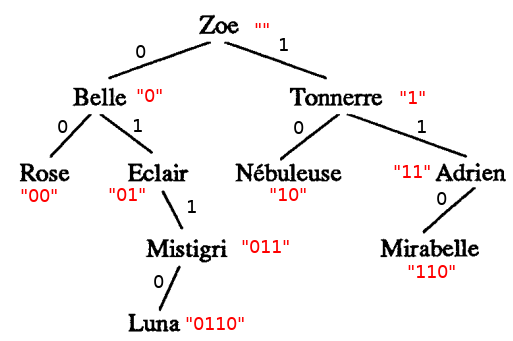
</p>

Le noeud racine a pour occurrence `""`. Si L'occurrence d'un noeud est `c`, celle de son fils gauche est`c0` et celle de son fils droit `c1`.

Par exemple, l'occurrence de Zoe est `""`, celle de Rose est `"00"`, celle de Mistigri est `"011"`...

#### Exercice 7

In [ ]:
%%run_pytest[clean]

def test_get_from_occ(pedigree):
    zoe = ""; mistigri = "011"; nebuleuse = "10"
    assert pedigree.get_from_occ(zoe) is pedigree
    assert pedigree.get_from_occ(mistigri).valeur == "Mistigri"
    assert pedigree.get_from_occ(nebuleuse).valeur == "Nébuleuse"
    assert pedigree.get_from_occ(mistigri+"1") is None

In [ ]:
def get_from_occ(self, occ):
    """Renvoie le noeud d'occurence donné par rapport au noeud courant self ou
    None si ce noeud n'existe pas."""
    pass

NoeudBin.get_from_occ = get_from_occ
del get_from_occ

In [ ]:
def get_from_occ(self, occ):
    """Renvoie le noeud d'occurence donné par rapport au noeud courant self ou
    None si ce noeud n'existe pas."""
    n = self
    for c in occ:
        n = n.gauche if c == "0" else n.droit
        if not n:
            return None
    return n

NoeudBin.get_from_occ = get_from_occ
del get_from_occ

#### Exercice 8

Plus dur, y revenir plus tard éventuellement...

In [ ]:
def occurrence(self, n):
    """ Renvoie l'«occurrence» du noeud fourni en argument relativement à l'arbre
    binaire enraciné au noeud courant self ou None si n n'est pas dans cet arbre.
    """
    pass

NoeudBin.occurrence = occurrence
del occurrence

In [ ]:
def occurrence(self, n):
    """ Renvoie l'«occurrence» du noeud fourni en argument relativement à l'arbre
    binaire enraciné au noeud courant self ou None si n n'est pas dans cet arbre.
    """
    if self.est_feuille() and self is not n:
        return None
    elif n is self:
        return ""
    elif n is self.gauche:
        return "0"
    elif n is self.droit:
        return "1"
    else:
        ng = self.gauche.occurrence(n) if self.gauche else None
        nd = self.droit.occurrence(n) if self.droit else None
        if not ng and not nd:
            return None
        if ng:
            return "0" + ng
        if nd:
            return "1" + nd

NoeudBin.occurrence = occurrence
del occurrence

## Parcours «main gauche»

Parcourir un arbre à «main gauche» est illustré sur la figure suivante:

<p style="text-align: center;">
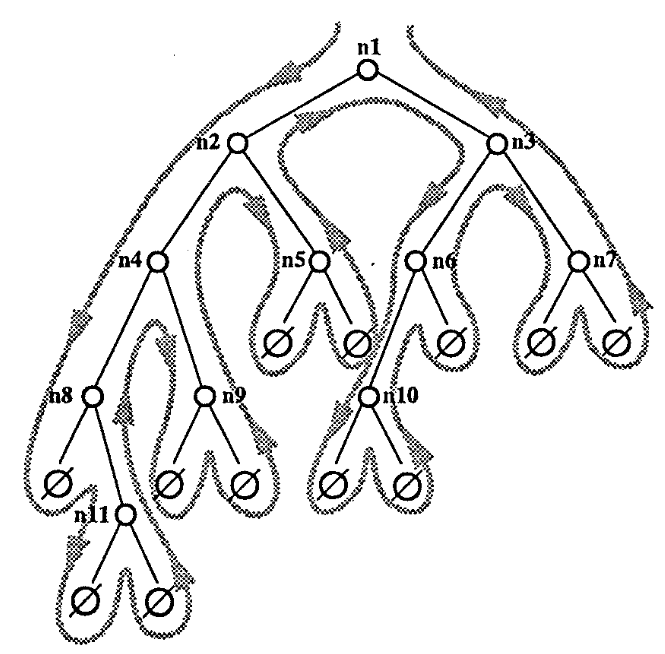
</p>

Dans un tel parcours, **chaque noeud est «rencontré» à trois reprises**:
- lors de la phase de descente: juste avant de parcourir son sous-arbre gauche,
- en remontant après avoir visité son sous-arbre gauche et juste avant de descendre dans son sous-arbre droit,
- en remontant après avoir visité son sous-arbre droit.

<p style="text-align: center;">
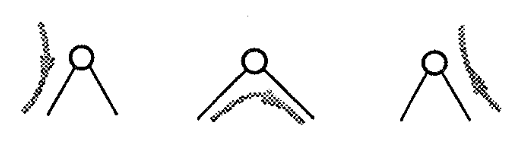
</p>

Il y a donc trois moments pour agir c'est-à-dire effectuer un certain traitement sur la base du noeud rencontré lors du parcours. Désignons par `t1`, `t2` et `t3` ces traitements qu'on peut modéliser par une fonction prenant un noeud en argument et produisant un certain effet.

Voici une méthode implémentant ce parcours qui par défaut ... ne fait rien!

In [ ]:
def ne_rien_faire(noeud):
    pass

def parcours_main_gauche(self, t1=ne_rien_faire, t2=ne_rien_faire, t3=ne_rien_faire):
    # avant parcours du sous-arbre gauche
    t1(self)

    # parcours du sous-arbre gauche s'il existe.
    if self.gauche:
        self.gauche.parcours_main_gauche(t1, t2, t3)

    # deuxième rencontre: 
    #   après avoir parcouru le sous-arbre gauche
    #   mais avant d'avoir parcouru le sous-arbre droit
    t2(self)

    # parcours du sous-arbre droit s'il existe.
    if self.droit:
        self.droit.parcours_main_gauche(t1, t2, t3)

    # troisième rencontre: après avoir parcouru le sous-arbre droit éventuel
    t3(self)

NoeudBin.parcours_main_gauche = parcours_main_gauche
del parcours_main_gauche

### Ordre préfixe

Lorsqu'on agit *à la première rencontre d'un noeud* (avant de descendre dans son sous-arbre gauche), on dit qu'on réalise un **parcours** (suivant l'ordre) **préfixe**.

#### Exercice 9

Définir `parcours_prefixe` en réutilisant `parcours_main_gauche`. Le traitement par défaut consiste à afficher la valeur du noeud courant. 

In [ ]:
%%run_pytest[clean]

def test_parcours_prefixe(pedigree, capsys):
    pedigree.parcours_prefixe(lambda n: print(n.valeur[0], end=""))
    # capsys est un objet de pytest servant à récupérer la sortie standard (entre autre)
    out, _ = capsys.readouterr() # on récupère la sortie standard qui se trouve dans out
    assert out == "ZBREMLTNAM"
    pedigree.parcours_prefixe()
    out, _ = capsys.readouterr()
    out = out.strip()
    assert out == "Zoé\nBelle\nRose\nEclair\nMistigri\nLuna\nTonnerre\nNébuleuse\nAdrien\nMirabelle"

In [ ]:
def parcours_prefixe(self, t=___):
    pass

NoeudBin.parcours_prefixe = parcours_prefixe
del parcours_prefixe

In [ ]:
def parcours_prefixe(self, t=lambda n: print(n.valeur)):
    self.parcours_main_gauche(t1=t)

NoeudBin.parcours_prefixe = parcours_prefixe
del parcours_prefixe

### Ordre infixe

Lorsqu'on agit à la *seconde rencontre d'un noeud* (en remontant du sous arbre gauche et avant de descendre dans le sous-arbre droit), on dit qu'on réalise un **parcours** (suivant l'ordre) **infixe**.

In [ ]:
def parcours_infixe(self, t=lambda n: print(n.valeur)):
    self.parcours_main_gauche(t2=t)

NoeudBin.parcours_infixe = parcours_infixe
del parcours_infixe

#### Exercice 10

En vous inspirant du test proposé plus haut, proposé un test pour le parcours infixe.

In [ ]:
%%run_pytest[clean]

def test_parcours_infixe(pedigree, capsys):
    # voir l'exemple pour parcours préfixe.

In [ ]:
%%run_pytest[clean]

def test_parcours_infixe(pedigree, capsys):
    pedigree.parcours_infixe(lambda n: print(n.valeur[0], end=""))
    out, _ = capsys.readouterr()
    assert out == "RBELMZNTMA"
    pedigree.parcours_infixe()
    out, _ = capsys.readouterr()
    out = out.strip()
    assert out == "Rose\nBelle\nEclair\nLuna\nMistigri\nZoé\nNébuleuse\nTonnerre\nMirabelle\nAdrien"

### Ordre post-fixe (ou suffixe)

Lorsqu'on agit à la troisième rencontre d'un noeud (en remontant du sous arbre droit), on dit qu'on réalise un **parcours** (suivant l'ordre) **post-fixe**.

In [ ]:
def parcours_postfixe(self, t=lambda n: print(n.valeur, end=" ")):
    self.parcours_main_gauche(t3=t)

NoeudBin.parcours_postfixe = parcours_postfixe
del parcours_postfixe

#### Exercice 11

Qu'afficherait parcours_postfixe appliqué à l'arbre arithmétique rappelé ci-dessous (séparateur: un espace)

<p style="text-align: center;">
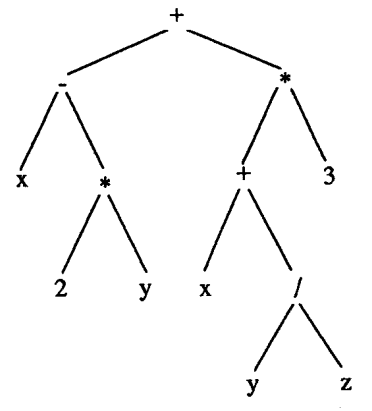
</p>

    x 2 y * - + x y z / + 3 * +

## Parcours par niveau

Dans ce parcours - qu'on appelle aussi **parcours en largeur d'abord** - on procède niveau par niveau et de *gauche à droite*.

Pour y parvenir on utilise une **file** (premier entré, premier sorti) qui contient initialement le noeud racine.

**Tant que** celle-ci n'est pas vide, on *défile* un noeud puis on lui applique un traitement et enfin, on *enfile* ses noeuds enfants de gauche à droite (s'il en a).

<p style="text-align: center;">
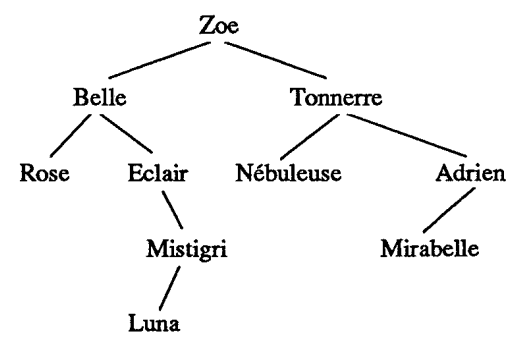
</p>

Par exemple, dans le parcours de pedigree, la file contient initialement (le noeud) `Zoé`.

| Après traitement de |          La file contient          |
|:-------------------:|:----------------------------------:|
|         Zoé         |          Tonnerre → Belle          |
|        Belle        |      Eclair → Rose → Tonnerre     |
|       Tonnerre      | Adrien → Nébuleuse → Eclair → Rose |
|         Rose        |     Adrien → Nébuleuse → Eclair    |
|        Eclair       |    Mistigri → Adrien → Nébuleuse   |
|      Nébuleuse      |          Mistigri → Adrien         |
|        Adrien       |        Mirabelle → Mistigri        |
|       Mistigri      |          Luna → Mirabelle          |
|      Mirabelle      |                Luna                |
|         Luna        |                  ∅                 |

#### Exercice 12

In [ ]:
def parcours_niveau(self, t=lambda n: print(n.valeur, end=" ")):
    from collections import deque 
    # deque() pour créer une file vide; .appendleft(noeud) pour enfiler; .pop() pour défiler
    pass

NoeudBin.parcours_niveau = parcours_niveau
del parcours_niveau

In [ ]:
def parcours_niveau(self):
    from collections import deque
    file = deque(); file.appendleft(self)
    while len(file) > 0:
        noeud = file.pop()
        if noeud.gauche:
            file.appendleft(noeud.gauche)
        if noeud.droit:
            file.appendleft(noeud.droit)
        print(noeud.valeur, end=" ")

NoeudBin.parcours_niveau = parcours_niveau
del parcours_niveau